In [2]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset contains Index(['Time [s]', 'Motor Torque [Nm]', 'Deflection [deg]',
       'Desired Torque [Nm]', 'Q_current/5'],
      dtype='object')
datarate is 278.0315133572322 Hz


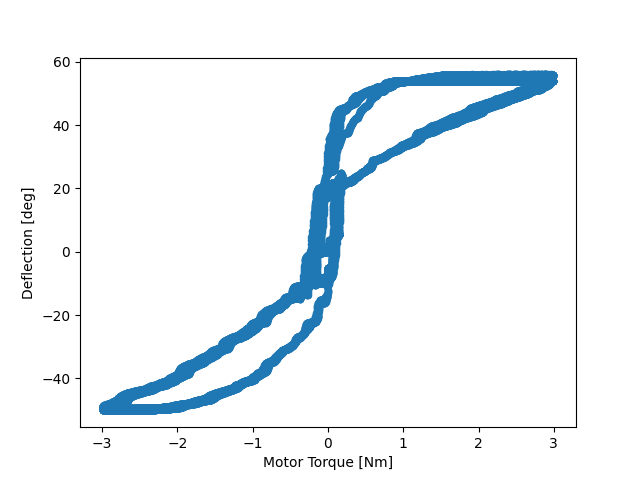

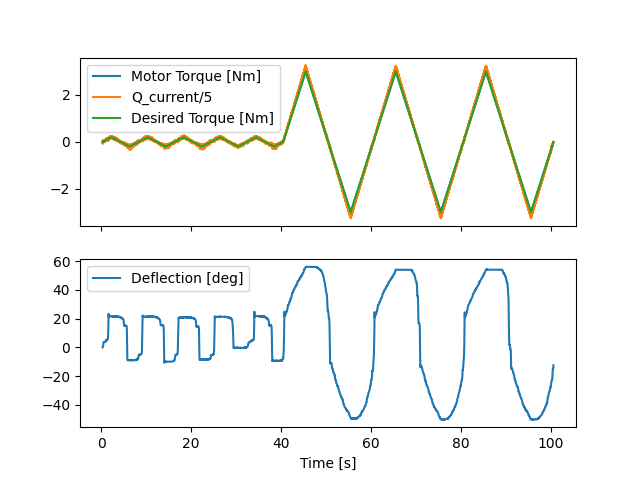

In [6]:
# filename = '../data/torqueramp_split pinwheel resin_2024-06-17_16-10-44.csv'
#filename = '../data/2024-06-17_17-03-22_torqueramp_split pinwheel resin - with preload.csv'
# filename = '../data/2024-06-18_11-15-23_torqueramp_split pinwheel resin preload.csv'
filename = '../data/2024-06-18_17-38-36_torqueramp_baseline.csv'

df_raw = pd.read_csv(filename)

df = pd.DataFrame()
df['Time [s]'] = df_raw['TIME']
df['Motor Torque [Nm]'] = df_raw['TORQUE'].rolling(window=20, center=True).mean()
df['Deflection [deg]'] = df_raw['POSITION'] * 360
df['Desired Torque [Nm]'] = df_raw['CONTROL_TORQUE']
df['Q_current/5'] = df_raw['Q_CURRENT']/5

print('dataset contains', df.columns)
print(f"datarate is {1/(df['Time [s]'].diff().mean())} Hz")	

fig, axs = plt.subplots(2, 1, sharex=True)
df.plot(x='Time [s]', y=['Motor Torque [Nm]', 'Q_current/5', 'Desired Torque [Nm]'], ax=axs[0])
df.plot(x='Time [s]', y='Deflection [deg]', ax=axs[1])

df.plot(x='Motor Torque [Nm]', y='Deflection [deg]', kind='scatter')
plt.show()

In [ ]:
PLAY_TORQUE_THRESHOLD = 0.1



play: 0.09967041015625, (neg: -0.0329132080078125, pos: 0.0667572021484375)
pos stiffness: 23.02988100431339, (offset:0.27650281898611256)
neg stiffness: nan, (offset:nan)


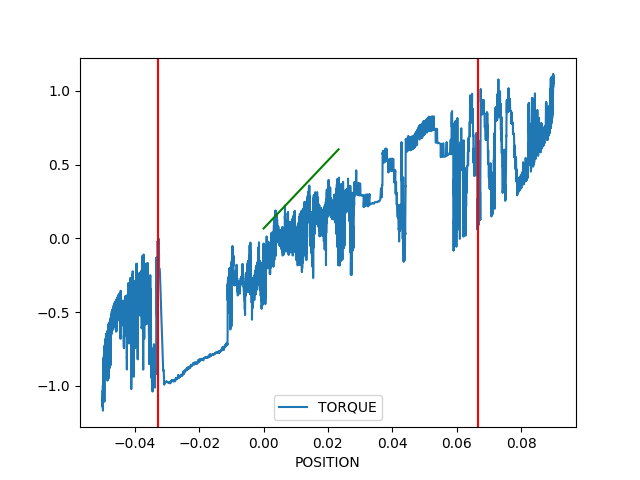

In [12]:
# use the torque displacement curve to estimate play and actuator stiffness
tp = df[['TORQUE', 'POSITION']]
tp = tp.sort_values(by='POSITION')
tp = tp.reset_index(drop=True)

#do some smoothing
tp['TORQUE'] = tp['TORQUE'].rolling(window=10).mean()

#plot measurements
fig, ax = plt.subplots()
tp.plot(x='POSITION', y='TORQUE', ax=ax)

# estimate play
PLAY_TORQUE_THRESHOLD = 0.1
pos_play = tp[tp['TORQUE'] < PLAY_TORQUE_THRESHOLD]
pos_play = pos_play['POSITION'].max()
neg_play = tp[tp['TORQUE'] > -PLAY_TORQUE_THRESHOLD]
neg_play = neg_play['POSITION'].min()

play = pos_play - neg_play
print(f'play: {play}, (neg: {neg_play}, pos: {pos_play})')

ax.axvline(neg_play, color='r')
ax.axvline(pos_play, color='r')

# estimate stiffness
pos_tp = tp[tp['POSITION'] > pos_play] - pos_play
neg_tp = tp[tp['POSITION'] < neg_play] + neg_play

pos_stiffness, pos_offset = np.polyfit(pos_tp['POSITION'], pos_tp['TORQUE'], 1)
neg_stiffness, neg_offset = np.polyfit(neg_tp['POSITION'], neg_tp['TORQUE'], 1)

ax.plot(pos_tp['POSITION'], pos_tp['POSITION']*pos_stiffness+pos_play, color='g')
ax.plot(neg_tp['POSITION'], neg_tp['POSITION']*neg_stiffness-neg_play, color='g')

print(f'pos stiffness: {pos_stiffness}, (offset:{pos_offset})')
print(f'neg stiffness: {neg_stiffness}, (offset:{neg_offset})')


play: 0.7536468505859375, (neg: -0.2742767333984375, pos: 0.4793701171875)


TypeError: expected non-empty vector for x

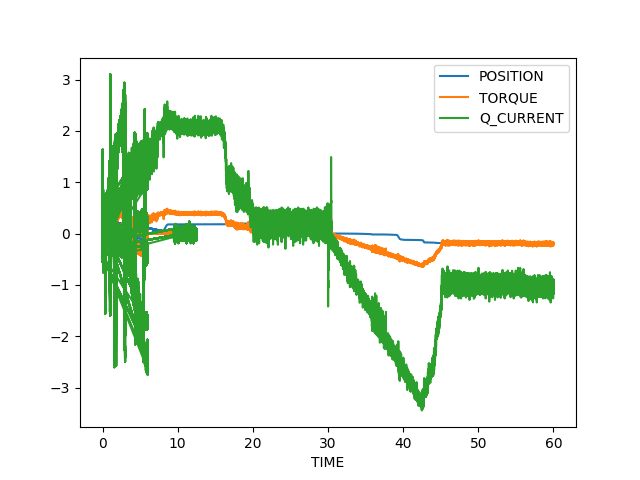

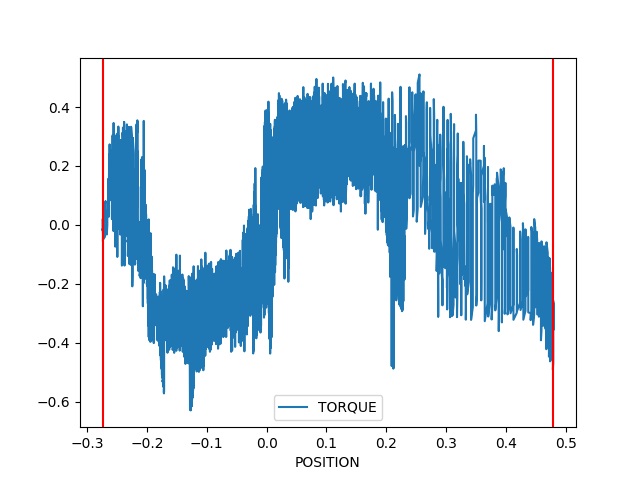

In [6]:
df = pd.read_csv('../data/torqueramp_2024-06-13_11-50-51.csv')
df.plot(x='TIME')

# use the torque displacement curve to estimate play and actuator stiffness
tp = df[['TORQUE', 'POSITION']]
tp = tp.sort_values(by='POSITION')
tp = tp.reset_index(drop=True)

#do some smoothing
tp['TORQUE'] = tp['TORQUE'].rolling(window=10).mean()

#plot measurements
fig, ax = plt.subplots()
tp.plot(x='POSITION', y='TORQUE', ax=ax)

# estimate play
PLAY_TORQUE_THRESHOLD = 0.1
pos_play = tp[tp['TORQUE'] < PLAY_TORQUE_THRESHOLD]
pos_play = pos_play['POSITION'].max()
neg_play = tp[tp['TORQUE'] > -PLAY_TORQUE_THRESHOLD]
neg_play = neg_play['POSITION'].min()

play = pos_play - neg_play
print(f'play: {play}, (neg: {neg_play}, pos: {pos_play})')

ax.axvline(neg_play, color='r')
ax.axvline(pos_play, color='r')

# estimate stiffness
pos_tp = tp[tp['POSITION'] > pos_play] - pos_play
neg_tp = tp[tp['POSITION'] < neg_play] + neg_play

pos_stiffness, pos_offset = np.polyfit(pos_tp['POSITION'], pos_tp['TORQUE'], 1)
neg_stiffness, neg_offset = np.polyfit(neg_tp['POSITION'], neg_tp['TORQUE'], 1)

ax.plot(pos_tp['POSITION'], pos_tp['POSITION']*pos_stiffness+pos_play, color='g')
ax.plot(neg_tp['POSITION'], neg_tp['POSITION']*neg_stiffness-neg_play, color='g')

print(f'pos stiffness: {pos_stiffness}, (offset:{pos_offset})')
print(f'neg stiffness: {neg_stiffness}, (offset:{neg_offset})')


NameError: name 'pd' is not defined

In [13]:
df = pd.read_csv('../data/torqueramp_bah_2024-06-13_14-25-17.csv')
df.describe()

#check if 'fault' ever nonzero
df['FAULT'].sum()

0